In [73]:
import easyocr
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [74]:
IMAGE_PATH = 'ui100_threshold.png'

In [75]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
print(len(result))
print(result)

Using CPU. Note: This module is much faster with a GPU.


142
[([[396, 96], [866, 96], [866, 128], [396, 128]], 'bie8 @RADUATE ICHOOL Of TECHNOLOGY', 0.49531942995929373), ([[469, 137], [521, 137], [521, 151], [469, 151]], 'Rmim', 0.23458905518054962), ([[525, 137], [571, 137], [571, 151], [525, 151]], '0.tar', 0.1610021957915234), ([[577, 137], [675, 137], [675, 153], [577, 153]], 'muigt-# imialt', 0.01599498798083455), ([[679, 139], [797, 139], [797, 155], [679, 155]], 'MtnM #mmi KTt', 0.0027836255561022307), ([[551, 165], [691, 165], [691, 179], [551, 179]], 'I1t)Filaat| IDfl (Pav', 0.0013389212387452287), ([[695, 167], [749, 167], [749, 179], [695, 179]], '1IT ! ITTI', 0.026471192400223477), ([[477, 177], [790, 177], [790, 206], [477, 206]], 'Thoory Examinatlon mork ohoot', 0.26427978495336973), ([[118, 238], [394, 238], [394, 264], [118, 264]], 'B0 Etam hold durtno FIrte Halt oi 2021', 0.05505999352771086), ([[120, 266], [292, 266], [292, 290], [120, 290]], 'Conlra Noing biesa5t.', 0.22616259881225453), ([[297, 269], [335, 269], [335, 28

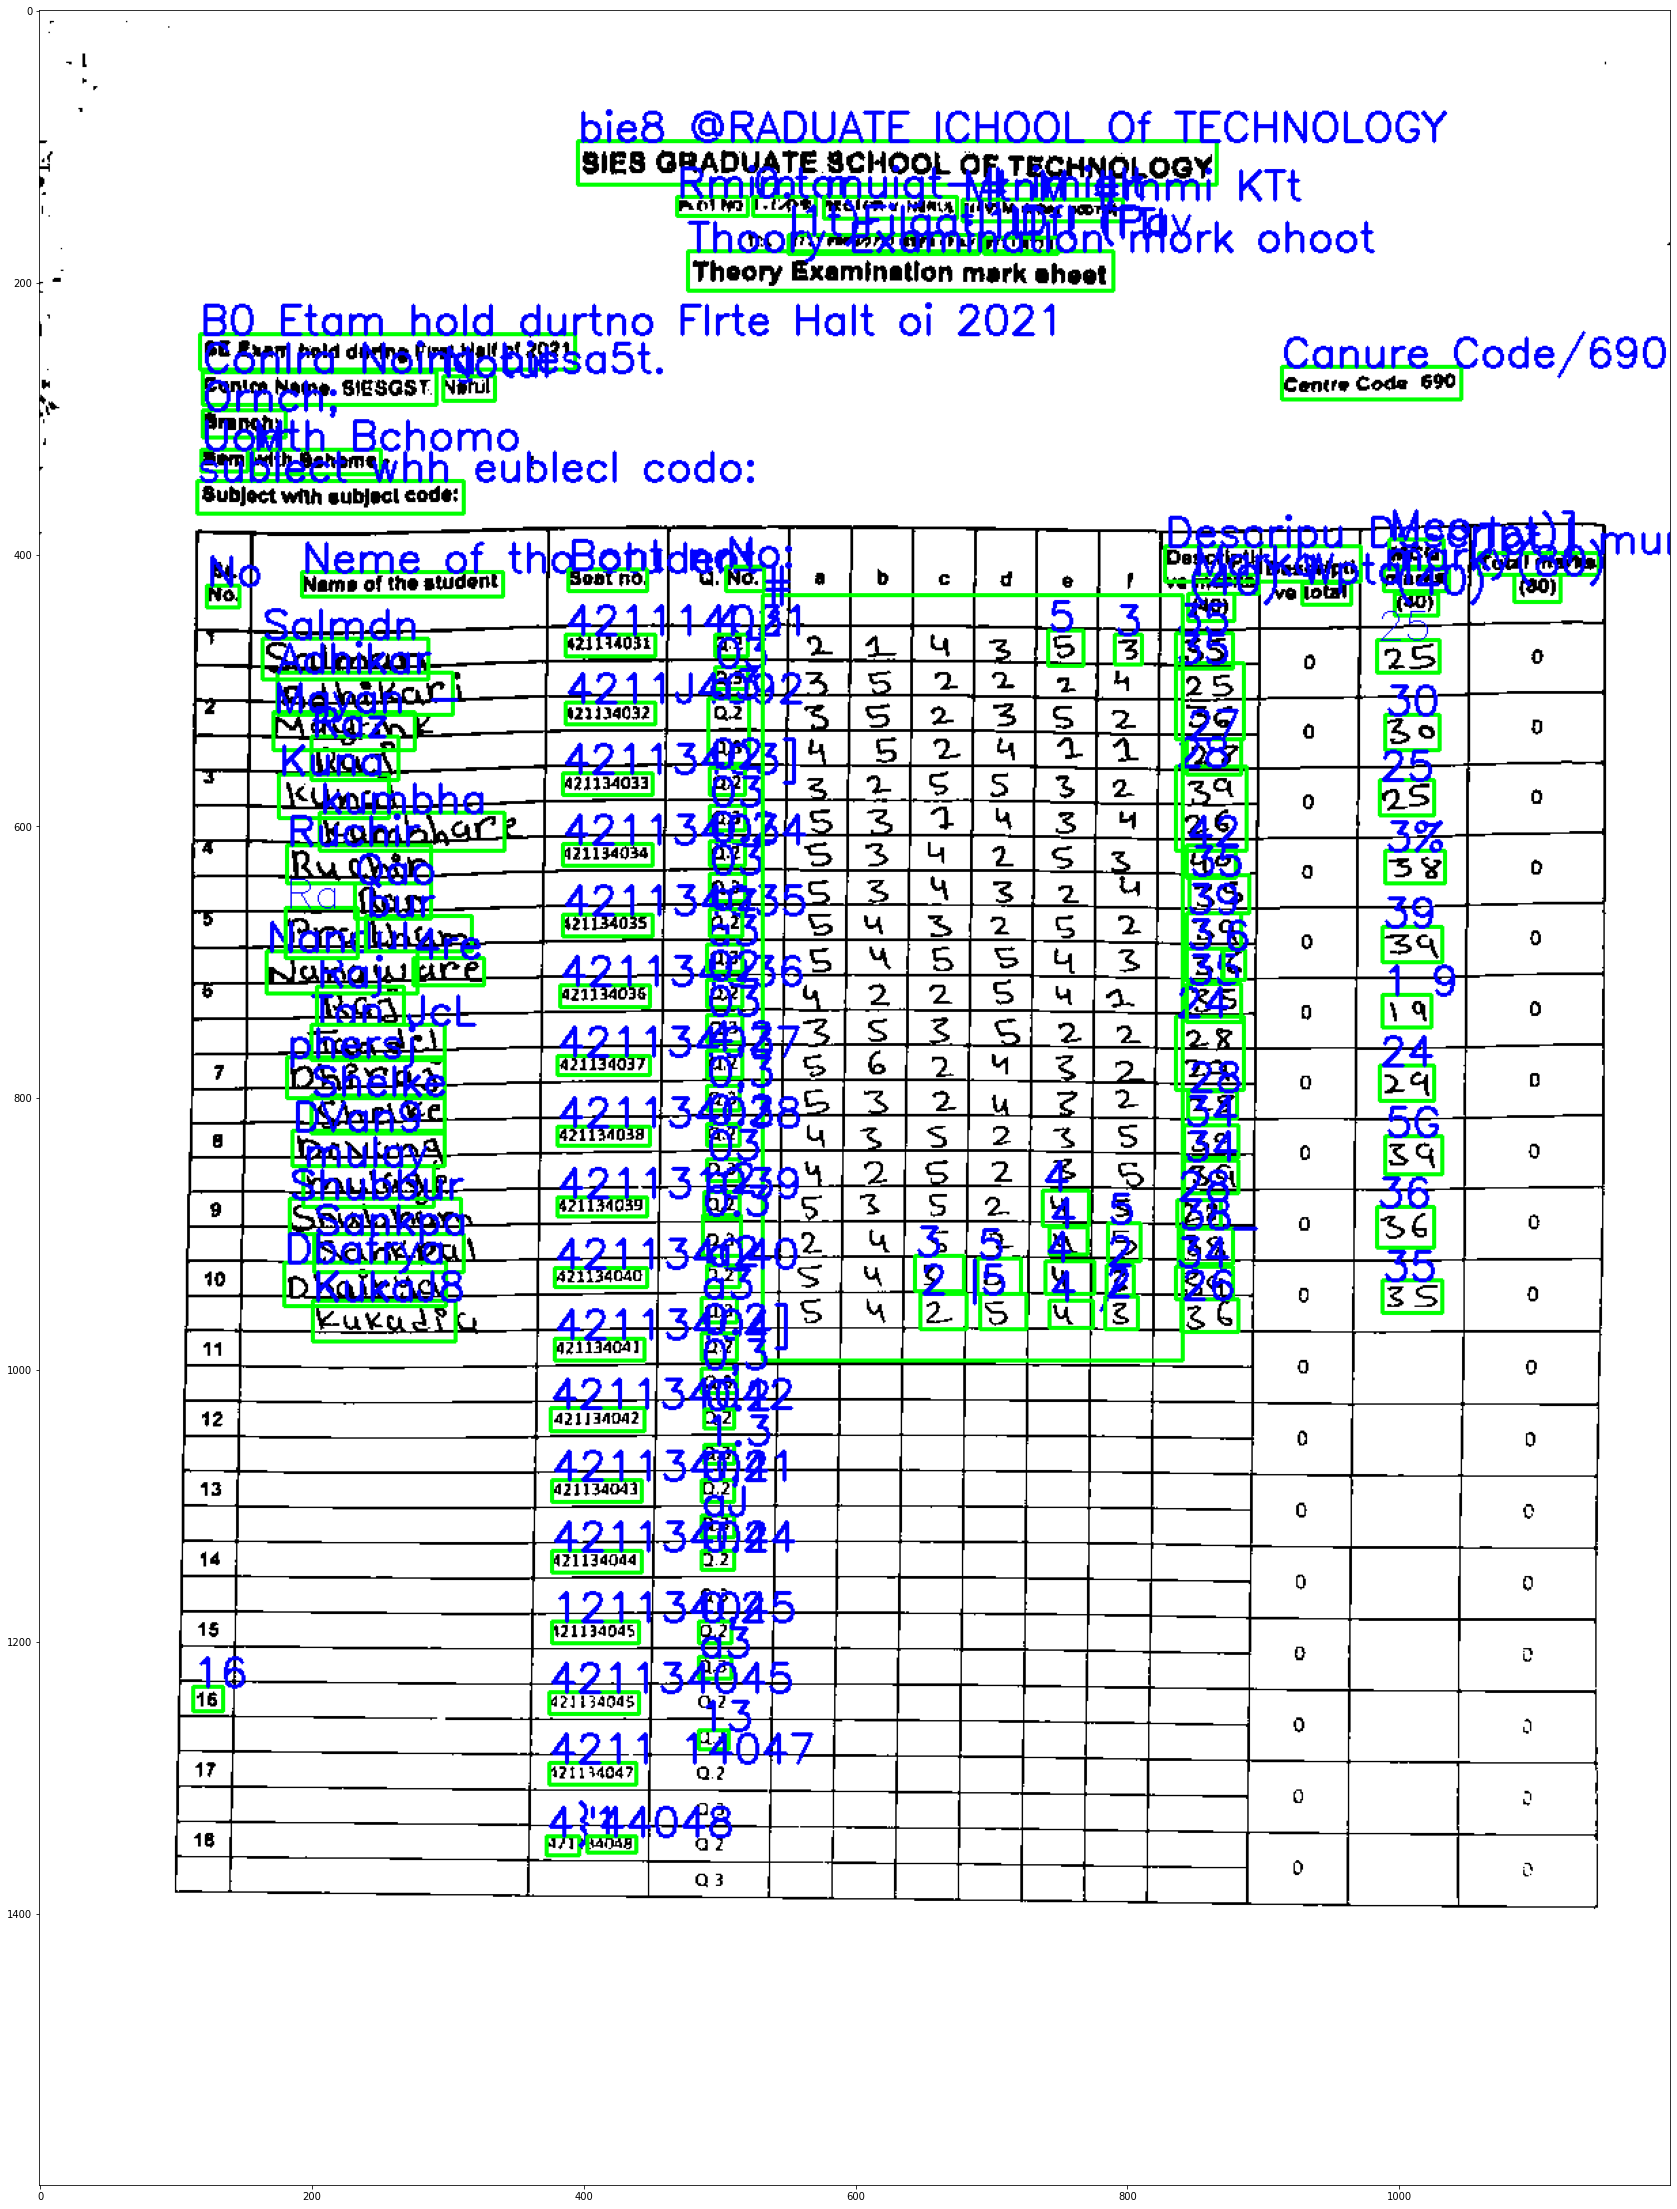

In [76]:
img = cv.imread(IMAGE_PATH)
font = cv.FONT_HERSHEY_SIMPLEX
from spellchecker import SpellChecker
 
spell = SpellChecker()
for i in range(len(result)):
    try:
        cv.rectangle(img, tuple(result[i][0][0]), tuple(result[i][0][2]), (0,255,0), 2)
        cv.putText(img, result[i][1], tuple(result[i][0][0]), font, 1, (0,0,255), 2)
    except:
        numbers = [ int(x) for x in result[i][0][0] ]
        numbers2 = [ int(x) for x in result[i][0][2] ]
        cv.rectangle(img, numbers, numbers2, (0,255,0), 2)
        cv.putText(img=img, text=result[i][1], org=numbers, fontFace=font,fontScale=1, color=(0,0,255), thickness=1)
plt.figure(figsize=(40,40))
plt.imshow(img)
plt.show()